<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e21-eda-model-en-es?scriptVersionId=141351866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E21 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

This is a very different type of challenge! For this challenge, your task is to improve a dataset that is being used to train a random forest model; in other words, your submission will be training data, not predictions. A random forest model will be trained on your submission, used to make predictions, and then those predictions will be used to generate your score.

The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. You are free to use the original in any way that you find useful.

Files
* ```sample_submission.csv``` - a sample submission file in the correct format.




**🟥ES**:

Se trata de un reto muy diferente. En este desafío, su tarea consiste en mejorar un conjunto de datos que se utiliza para entrenar un modelo de bosque aleatorio; en otras palabras, su presentación serán datos de entrenamiento, no predicciones. Un modelo de bosque aleatorio será entrenado en su presentación, utilizado para hacer predicciones, y luego esas predicciones se utilizarán para generar su puntuación.

El conjunto de datos para este concurso es un conjunto de datos sintético basado en el conjunto de datos de predicción de oxígeno disuelto en agua de río. Puede utilizar el original de cualquier forma que considere útil.

Archivos
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto.


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.stats.outliers_influence import variance_inflation_factor


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

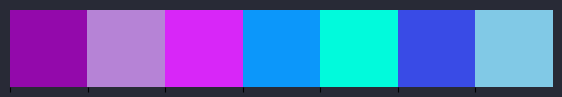

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
SEED = 42
N_SPLITS = 7
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e21"
SUBMISSION_FILENAME = "sample_submission.csv"


ID = "id"
O2_1 = "O2_1"
O2_2 = "O2_2"
BOD5_5 = "BOD5_5"
TARGET = "target"

SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [5]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 20:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [6]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [7]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [8]:
def calculate_vif(dataf):
    vif_df = pd.DataFrame()
    vif_df["Feature"] = dataf.columns
    vif_df["VIF"] = [variance_inflation_factor(dataf.values, i) for i in range(dataf.shape[1])]
    return vif_df


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [9]:
df = pd.read_csv(SUBMISSION_DIR)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [10]:
print(f"Dataframe description\n")
data_description(df)

Dataframe description

Data description
Total number of records 3500
number of features 37


      Name     Type  Unique levels  Missing
0       id    int64           3500        0
1   target  float64            462        0
2     O2_1  float64            329        0
3     O2_2  float64            258        0
4     O2_3  float64            235        0
5     O2_4  float64            241        0
6     O2_5  float64            317        0
7     O2_6  float64            238        0
8     O2_7  float64            303        0
9    NH4_1  float64            152        0
10   NH4_2  float64            157        0
11   NH4_3  float64            120        0
12   NH4_4  float64            366        0
13   NH4_5  float64            397        0
14   NH4_6  float64             80        0
15   NH4_7  float64             84        0
16   NO2_1  float64            116        0
17   NO2_2  float64            113        0
18   NO2_3  float64             75        0
19   NO2_4  float64        

In [11]:
df.columns

Index(['id', 'target', 'O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7',
       'NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1',
       'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2',
       'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2',
       'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'],
      dtype='object')

In [12]:
df.describe().T.style.bar(
    subset=["mean"], 
    color=px.colors.qualitative.G10[2]
).background_gradient(
    subset=["std"], 
    cmap='Blues'
).background_gradient(
    subset=["50%"], 
    cmap='YlGn')

,count,mean,std,min,25%,50%,75%,max
id,3500.000000,1749.500000,1010.507298,0.000000,874.750000,1749.500000,2624.250000,3499.000000
target,3500.000000,8.473834,1.885712,1.300000,7.470000,8.280000,9.110000,65.930000
O2_1,3500.000000,8.216993,3.040743,0.000000,7.100000,7.890000,9.100000,46.950000
O2_2,3500.000000,9.291581,6.817822,0.000000,7.300000,8.300000,8.700000,65.950000
O2_3,3500.000000,9.633064,1.439039,4.900000,8.770000,9.500000,9.545000,16.900000
O2_4,3500.000000,8.065733,1.463881,2.300000,6.830000,7.980000,9.265000,21.800000
O2_5,3500.000000,5.671581,2.721399,0.200000,4.550000,5.800000,7.015000,59.400000
O2_6,3500.000000,9.461363,1.140365,0.000000,8.980000,9.430000,10.070000,40.190000
O2_7,3500.000000,6.547433,1.663266,0.000000,5.877500,6.430000,7.150000,15.900000
NH4_1,3500.000000,0.340525,0.284751,0.020000,0.214500,0.247000,0.370000,4.200000


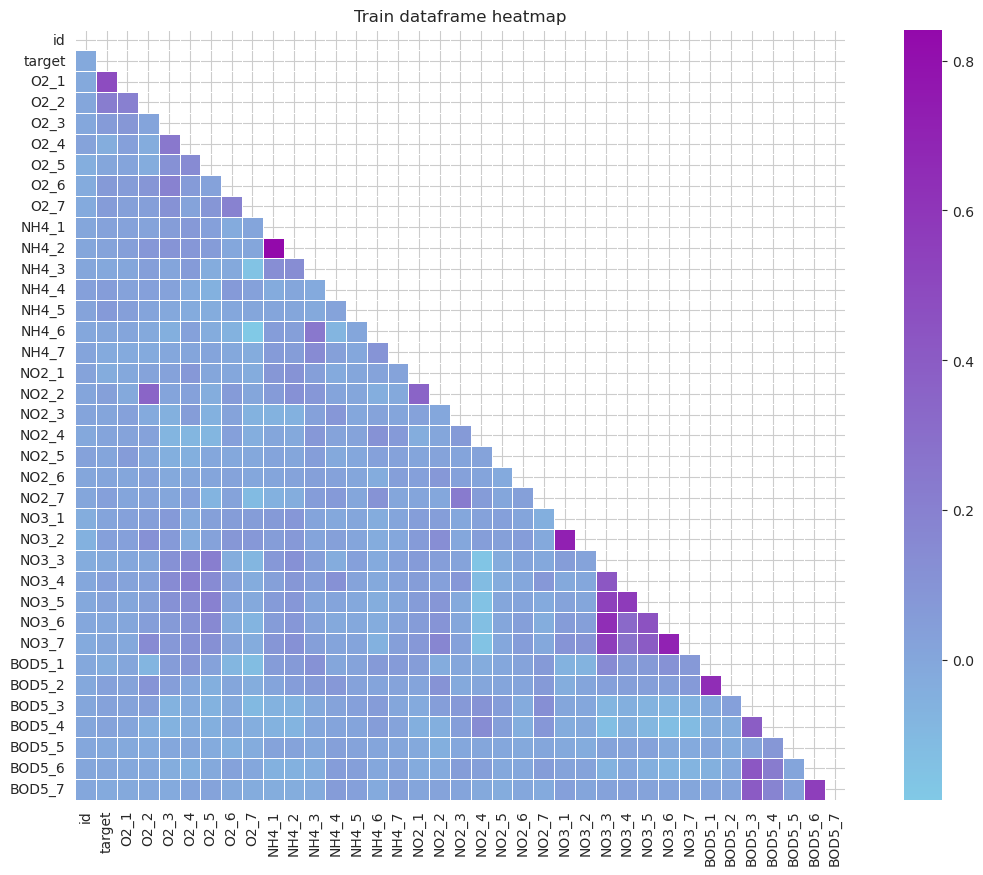

None

In [13]:
display(show_corr_heatmap(df, "Train dataframe heatmap"))

In [14]:
df.target = df.target.clip(7, 20)

In [15]:
clf = SGDOneClassSVM(nu=0.55).fit(df.drop([ID],axis=1))
print(len(np.array(np.where(clf.predict(df.drop([ID],axis=1))==-1))[0]))
df.drop(np.array(np.where(clf.predict(df.drop([ID],axis=1))==-1))[0], axis=0, inplace=True)
print(len(df))
df = df.reset_index(drop=True)

33
3467


In [16]:
# Create an IsolationForest classifier with a random state of 0 and fit it to the DataFrame
clf = IsolationForest(random_state=0).fit(df.drop([ID], axis=1))

# Predict outliers using the fitted classifier and get the count of outliers
len(np.array(np.where(clf.predict(df.drop([ID],axis=1))==-1))[0])


55

In [17]:
# Predict outliers using the classifier and drop corresponding rows from the DataFrame
outlier_indices = np.array(np.where(clf.predict(df.drop([ID], axis=1)) == -1))[0]
df.drop(outlier_indices, axis=0, inplace=True)

# Reset the index of the DataFrame after dropping rows
df = df.reset_index(drop=True)

# Get and print the length of the modified DataFrame
length_after_modification = len(df)
print(length_after_modification)

3412


In [18]:
# Drop the 'ID' column from the DataFrame
data = df.drop([ID], axis=1)

# Select columns starting from the third column (index 2)
selected_feat = df.columns[2:]

# Initialize a LocalOutlierFactor model with parameters: 
# n_neighbors is set to 3 (number of neighbors to consider), 
# and contamination is set to 0.1 (assumed proportion of outliers in the data)
local_of = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

# Fit the LocalOutlierFactor model on the selected features of the DataFrame
preds = local_of.fit_predict(df[selected_feat])

# Find the indices of data points that are predicted as outliers by the model
anomaly_ix = np.where(preds == -1)[0]

# Drop the rows with outlier indices from the DataFrame
df = df.drop(index=anomaly_ix)

# Reset the index of the DataFrame after dropping rows and modify it in place
df.reset_index(drop=True, inplace=True)

In [19]:
cols = [O2_1, O2_2, BOD5_5, TARGET]
all_columns = df.columns

for i in all_columns:
    if i not in cols:
        df[i]=0

In [20]:
num_variable = df.columns.drop([TARGET,ID])
vif_res = calculate_vif(df[num_variable])
print(vif_res)

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


   Feature       VIF
0     O2_1  5.209094
1     O2_2  3.069589
2     O2_3       NaN
3     O2_4       NaN
4     O2_5       NaN
5     O2_6       NaN
6     O2_7       NaN
7    NH4_1       NaN
8    NH4_2       NaN
9    NH4_3       NaN
10   NH4_4       NaN
11   NH4_5       NaN
12   NH4_6       NaN
13   NH4_7       NaN
14   NO2_1       NaN
15   NO2_2       NaN
16   NO2_3       NaN
17   NO2_4       NaN
18   NO2_5       NaN
19   NO2_6       NaN
20   NO2_7       NaN
21   NO3_1       NaN
22   NO3_2       NaN
23   NO3_3       NaN
24   NO3_4       NaN
25   NO3_5       NaN
26   NO3_6       NaN
27   NO3_7       NaN
28  BOD5_1       NaN
29  BOD5_2       NaN
30  BOD5_3       NaN
31  BOD5_4       NaN
32  BOD5_5  4.010275
33  BOD5_6       NaN
34  BOD5_7       NaN
